In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [11]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: my_first_submission.csv
  File: .DS_Store
  File: test.csv
  File: Readme.md
  File: .gitignore
  File: sample_submission.csv
  File: read_files.ipynb
Directory: ./final_submission
  File: optuna_merged.ipynb
Directory: ./final_submission/mats_explore_to_merge
  File: dora_consecutive_measures.ipynb
  File: dora_pipeline_new_group.ipynb
  File: dora_pipeline.ipynb
  File: 0dora.ipynb
Directory: ./final_submission/merged
  File: merged_explore.ipynb
Directory: ./mats
  File: compare.ipynb
  File: dora.ipynb
  File: .DS_Store
  File: pipeline_tuning.py
  File: pipeline_new_remove.py
  File: .gitignore
  File: dora_pipeline_new_group.ipynb
  File: pipeline.py
  File: pipeline_new_group.py
  File: dora_pipeline.ipynb
Directory: ./mats/dataframes
  File: iterative_imputation.csv
Directory: ./mats/test_consectutive
  File: pipeline_old_remove_consec.py
  File: dora_consecutive_measures.ipynb
Directory: ./mats/gluon
  File: gluon_3_consecutive.ipynb
  File: utils.py
  Fil

In [12]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [13]:
train_a.describe()

,time,pv_measurement
count,34085,34085.000000
mean,2021-05-14 00:29:51.497726,630.594707
min,2019-06-02 22:00:00,0.000000
25%,2020-05-22 23:00:00,0.000000
50%,2021-05-13 00:00:00,5.940000
75%,2022-05-03 01:00:00,678.040000
max,2023-04-30 23:00:00,5733.420000
std,NaN,1165.902422


In [14]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')


In [15]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')


In [16]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')


In [17]:
X_test_estimated_a.columns

Index(['date_calc', 'date_forecast', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 'wind_spe

absolute_humidity_2m:gm3
air_density_2m:kgm3
ceiling_height_agl:m
clear_sky_energy_1h:J
clear_sky_rad:W


KeyboardInterrupt: 

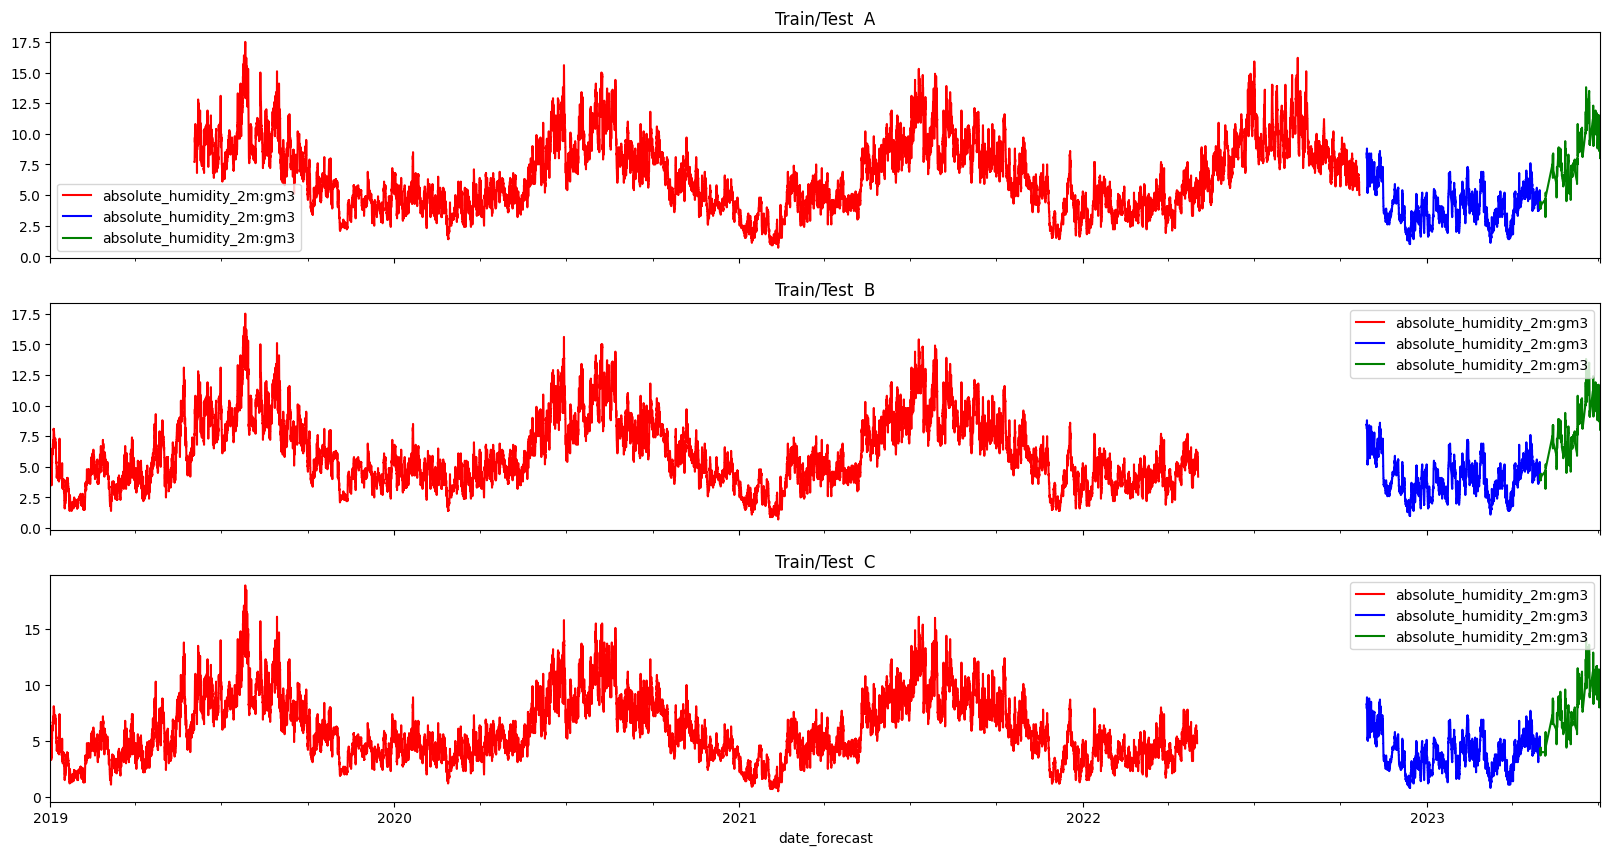

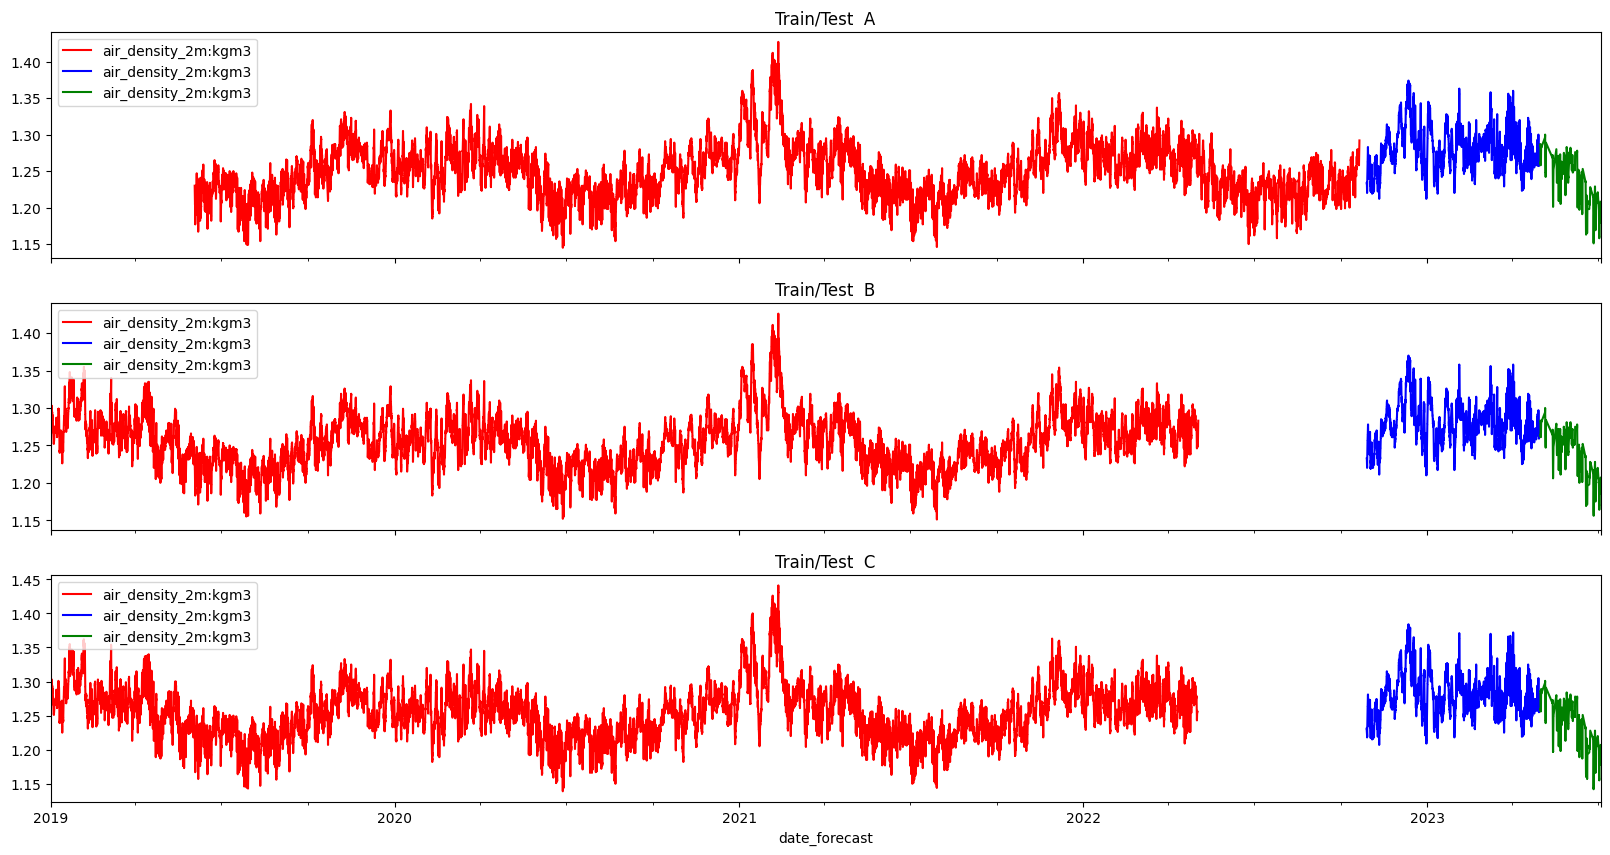

Error in callback <function flush_figures at 0x13f61e160> (for post_execute):


KeyboardInterrupt: 

In [26]:
# Plotting a single feature
drop = ["date_calc", "date_forecast"]
cols = [c for c in X_test_estimated_a.columns.tolist() if c not in drop]
for col in cols:
    print(col)
    fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    feature_name = col
    X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
    X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
    X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

    X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
    X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
    X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

    X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
    X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
    X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [ ]:
test = pd.read_csv('test.csv')
test


,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [ ]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)